### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Changing settings to see maximum data 

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

### Importing the SKLearn Library

In [4]:
# Importing required package
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [5]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

### Importing StatsModel Library

In [6]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1: Reading the Dataset and Initial Understanding

In [7]:
#Reading the dataset

leadsdata_raw = pd.read_csv(r"C:\Users\Anurag Pal\Desktop\upGrad\Machine Learning\Assignments\Logistic Regression\Lead Scoring Assignment\Leads.csv")

In [8]:
#Checking the first few rows of the data

leadsdata_raw.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#Checking the number of rows and columns of the dataset

leadsdata_raw.shape

(9240, 37)

In [10]:
#Checking the datatype of the columns in the dataset

leadsdata_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
#Checking the summary of the dataset

leadsdata_raw.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### *Inference: The columns "TotalVisits", "Total Time Spent on Website" and "Page Views Per Visit	" have a significant difference between 75% and maximum value indicating presence of outliers.*

## Step 2: Dataset Cleaning and Dataset Transformation before EDA 

In [12]:
#Checking null values in the dataset

leadsdata_raw.isnull().sum()

Prospect ID                                      0   
Lead Number                                      0   
Lead Origin                                      0   
Lead Source                                      36  
Do Not Email                                     0   
Do Not Call                                      0   
Converted                                        0   
TotalVisits                                      137 
Total Time Spent on Website                      0   
Page Views Per Visit                             137 
Last Activity                                    103 
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                           0   
Magazine                                         0   
Newspaper Article           

In [13]:
#Checking percentage of missing/null values

round(100*(leadsdata_raw.isnull().sum()/len(leadsdata_raw)),2)

Prospect ID                                      0.00 
Lead Number                                      0.00 
Lead Origin                                      0.00 
Lead Source                                      0.39 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
Converted                                        0.00 
TotalVisits                                      1.48 
Total Time Spent on Website                      0.00 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                           0.00 
Magazine                                         0.00 
Newspaper 

#### Columns having > 30% Missing Values

- "Tags", "Lead Quality", "Lead Profile", "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score" and "Asymmetrique Profile Score" columns have > 30% missing values.

- Although "Country" column has < 30% missing values, we can't impute the data with "Mode" as it will induce biasness in the data.

- Extra columns that are created by the sales team (Like "Last Notable Activity") can be dropped as well

In [14]:
# Forming a list of columns for which the missing value % is more than 30%

high_null_cols = leadsdata_raw.columns[100*(leadsdata_raw.isnull().sum()/len(leadsdata_raw)) > 30]
print(high_null_cols)

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [15]:
# # Adding a few more columns that need to be dropped based on columns being relevant or not

#Converting index to list
high_null_cols = high_null_cols.tolist()

new_cols_to_append = ("Do Not Call","What matters most to you in choosing a course","Search","Magazine","Newspaper Article",
                       "X Education Forums","Newspaper", "Digital Advertisement","Through Recommendations",
                       "Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content",
                       "I agree to pay the amount through cheque")

high_null_cols.extend(new_cols_to_append)

In [16]:
high_null_cols

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [17]:
# Dropping the columns that have more than 30% missing values

df_leads = leadsdata_raw.drop(high_null_cols, axis=1)

In [18]:
#Checking shape of the dataframe

df_leads.shape

(9240, 18)

In [19]:
#Creating a new dataset from "df_leads" to check for duplicates

df_leads_dup_check = df_leads

In [20]:
#Dropping duplicates

df_leads_dup_check.drop_duplicates().shape

(9240, 18)

In [21]:
#Comparing if the shape of the new dataset after removing the duplicates is the sames as that of the "df_leads"

df_leads_dup_check.drop_duplicates().shape == df_leads.shape

True

#### *Inference: As the shape of the dataset remains same after dropping duplicates, it means that there are no duplicate rows present in dataset.*

In [22]:
#Checking percentage of missing/null values

round(100*(df_leads.isnull().sum()/len(df_leads)),2)

Prospect ID                               0.00 
Lead Number                               0.00 
Lead Origin                               0.00 
Lead Source                               0.39 
Do Not Email                              0.00 
Converted                                 0.00 
TotalVisits                               1.48 
Total Time Spent on Website               0.00 
Page Views Per Visit                      1.48 
Last Activity                             1.11 
Country                                   26.63
Specialization                            15.56
How did you hear about X Education        23.89
What is your current occupation           29.11
Lead Profile                              29.32
City                                      15.37
A free copy of Mastering The Interview    0.00 
Last Notable Activity                     0.00 
dtype: float64

In [23]:
# Forming a function to vizualise the values present in a column in the decreasing order

def values_plot(var):
    plt.figure(figsize=(15, 5))
    vals = (df_leads[var].value_counts(normalize=True)*100)
    plot_chart = vals.plot.bar(color=sns.color_palette('deep'))
    plot_chart.set(xlabel = var, ylabel = '% Value')

#### Dealing with columns having higher missing values % first

#### a) Country 

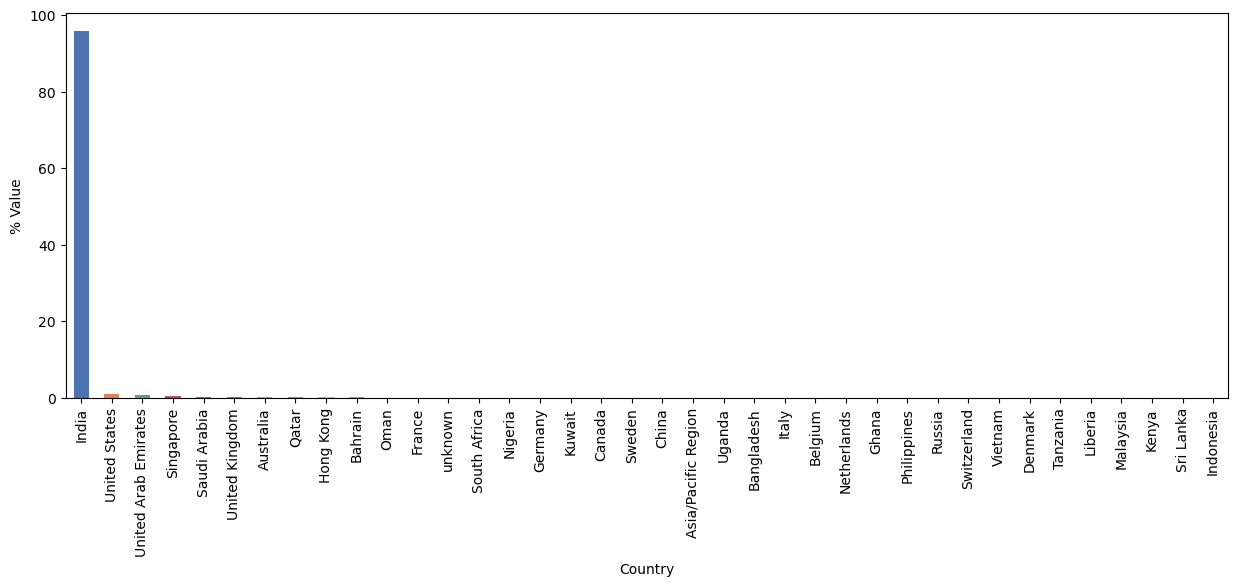

In [24]:
# Checking the plot for: Country

values_plot("Country")

#### *Inference: Since "India" is the highest value, we can impute the data with "India" as a country .*

In [25]:
#Filling the missing values with "India"

df_leads.Country.fillna('India',inplace=True)

#### b) Specialization 

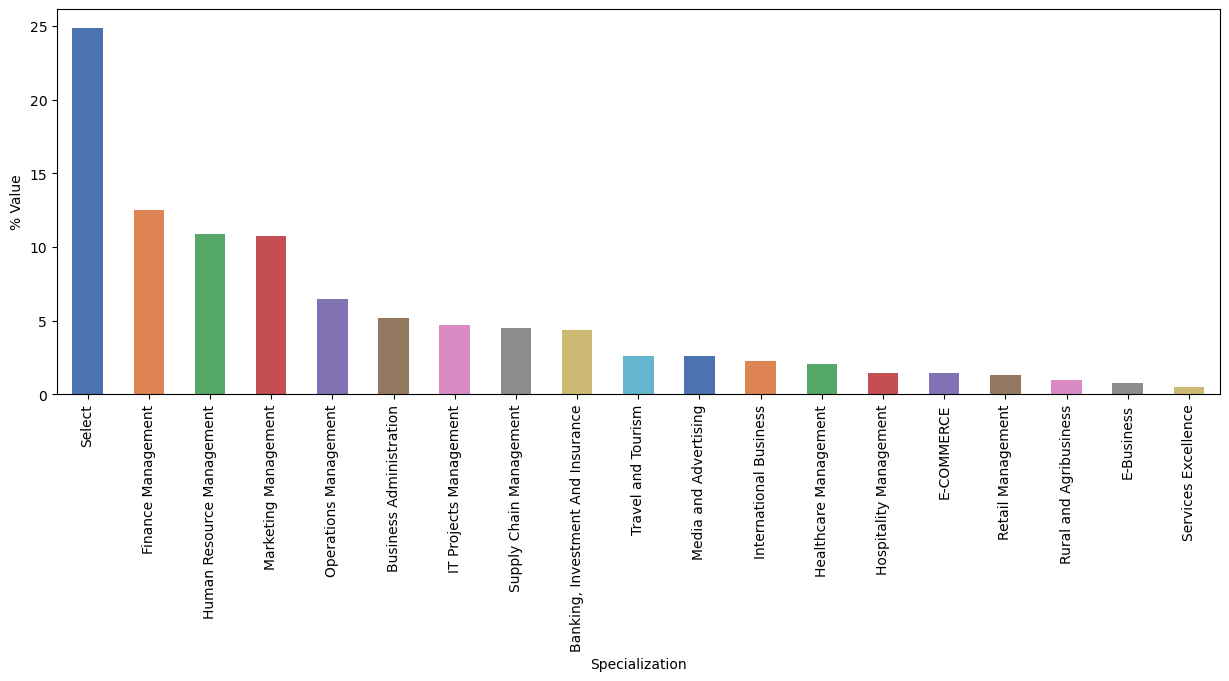

In [26]:
# Checking the plot for: Specialization

values_plot("Specialization")

#### *Inference: There's a chance that a person doesn't have a specialization. Hence, rather than arbitrarily initialising mode value of this column, it'd be better to create a new category called "Others" for the missing values.*

In [27]:
#Creating a new Specialization "Others" for the missing values

df_leads['Specialization'].fillna('Others',inplace=True)

#### c) How did you hear about X Education 

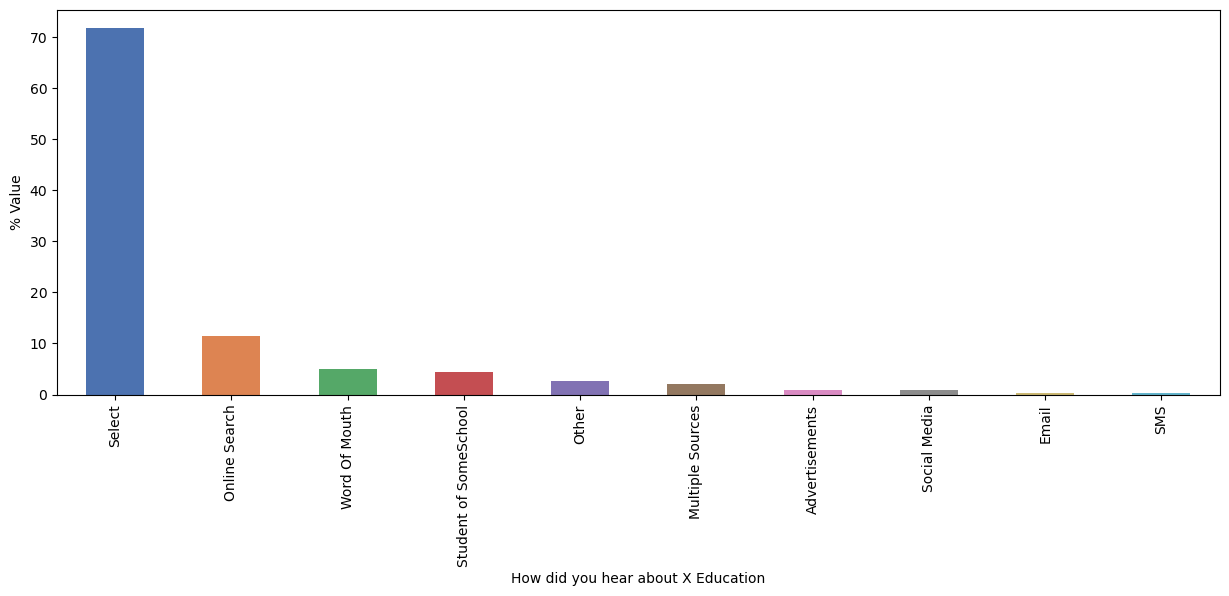

In [28]:
# Checking the plot for: How did you hear about X Education

values_plot("How did you hear about X Education")

In [29]:
#Adding the missing values to the "Other"

df_leads['How did you hear about X Education'].fillna('Other',inplace=True)

#### d) What is your current occupation

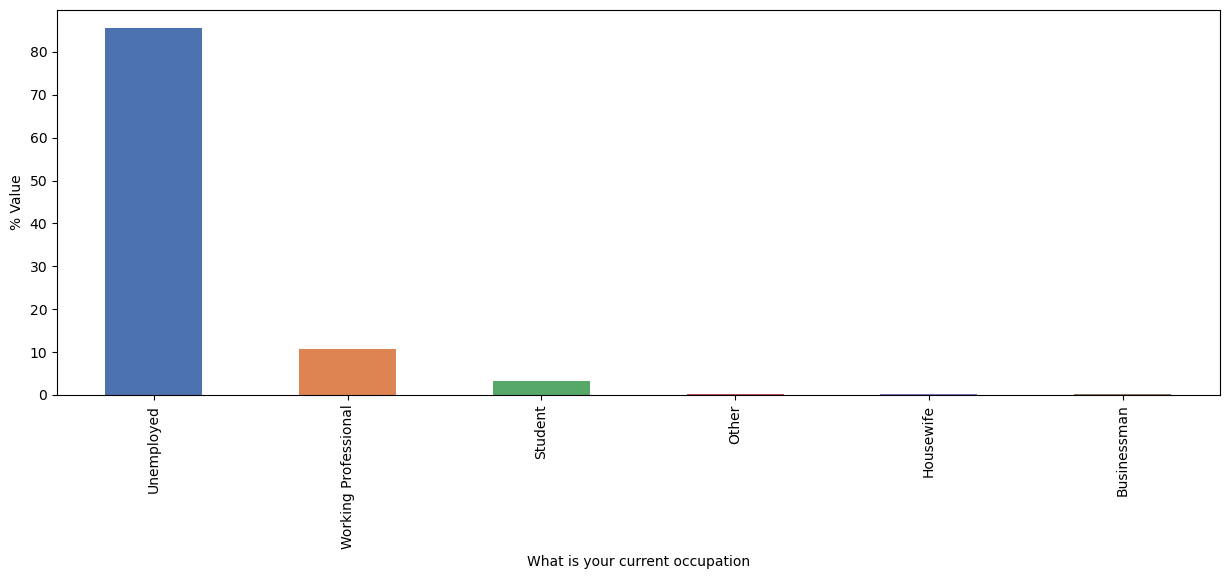

In [30]:
# Checking the plot for: What is your current occupation

values_plot("What is your current occupation")

In [31]:
#Adding the missing values to the "Other"

df_leads['What is your current occupation'].fillna('Other',inplace=True)

#### e) Lead Profile

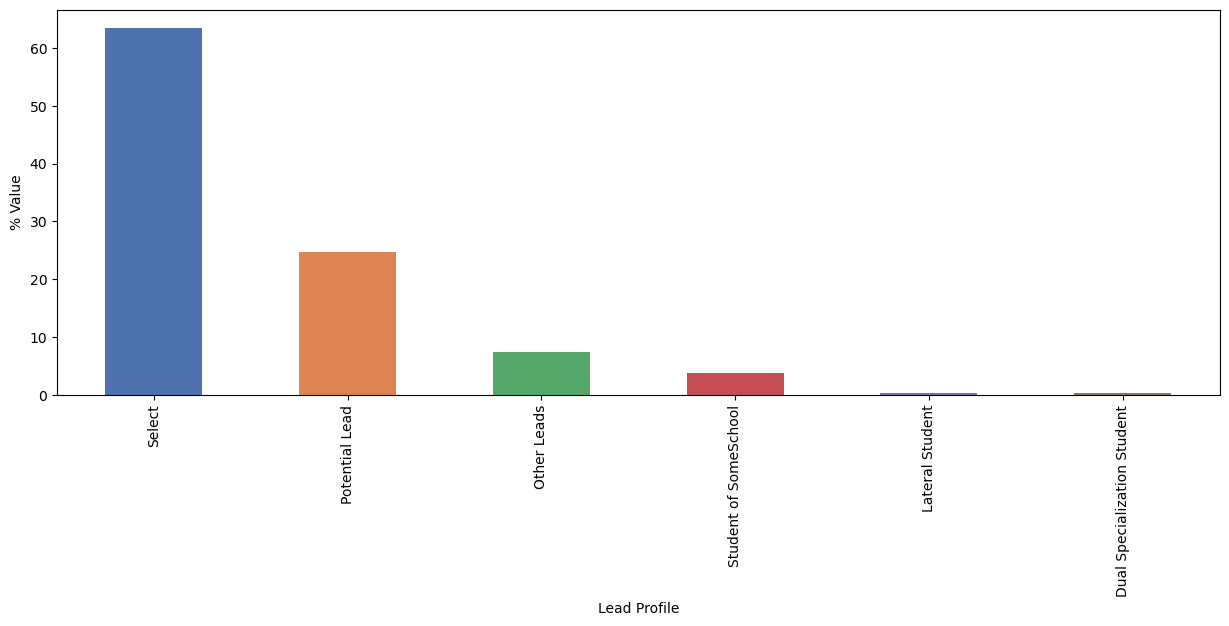

In [32]:
# Checking the plot for: Lead Profile

values_plot("Lead Profile")

In [33]:
#Adding the missing values to the "Other"

df_leads['Lead Profile'].fillna('Other Leads',inplace=True)

In [34]:
# City                                      15.37

#### f) City

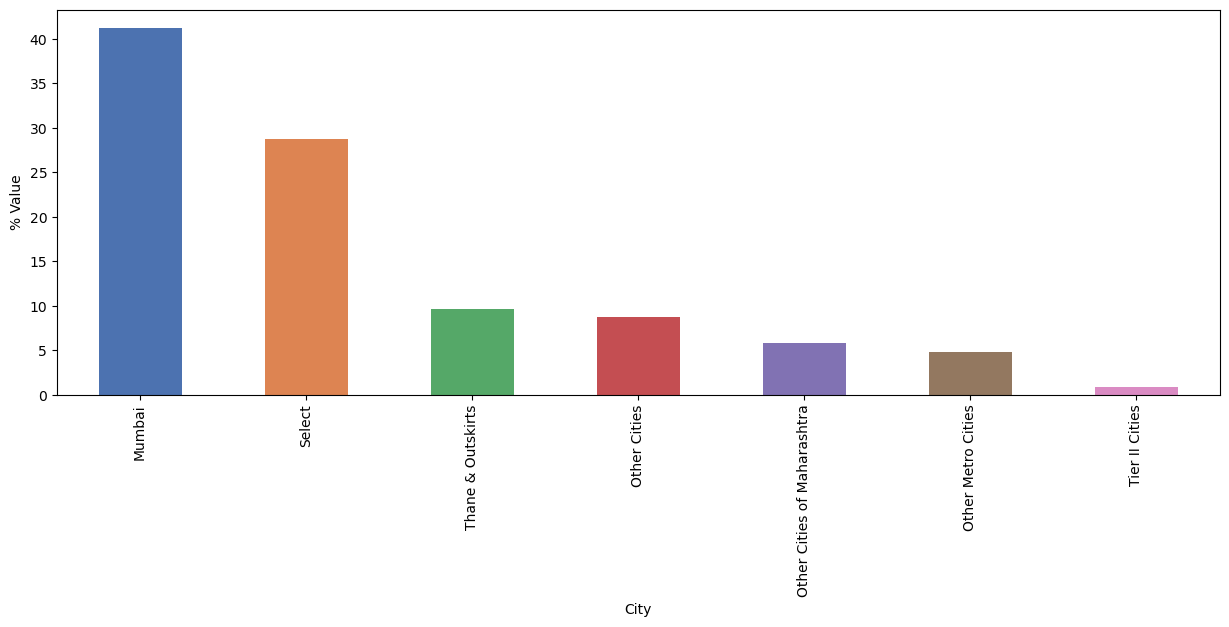

In [35]:
# Checking the plot for: City

values_plot("City")

In [36]:
#Filling the missing values with "Mumbai"

df_leads.City.fillna('Mumbai',inplace=True)

#### Dealing with columns having lesser missing values % now

In [37]:
#Checking percentage of missing/null values

round(100*(df_leads.isnull().sum()/len(df_leads)),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
How did you hear about X Education        0.00
What is your current occupation           0.00
Lead Profile                              0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### *Inference: The columns "Lead Source", "TotalVisits", "Page Views Per Visit" and "Last Activity" have very less missing values % (< 2%). Hence, we can remove the null rows instead of treating them.*

In [38]:
#Dropping the rows that have null values

df_leads.dropna(inplace = True)

In [39]:
#Checking percentage of missing/null values

round(100*(df_leads.isnull().sum()/len(df_leads)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
How did you hear about X Education        0.0
What is your current occupation           0.0
Lead Profile                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### *Inference: All the null values in the data have been treated.*

In [40]:
#Checking shape of the dataframe

df_leads.shape

(9074, 18)

In [41]:
# lead_df1.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
#           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1,inplace=True)

In [42]:
# Lead Origin	Lead Source	Do Not Email	Converted	TotalVisits	Total Time Spent on Website	Page Views Per Visit	Last Activity	Specialization	What is your current occupation	Tags	Lead Quality	City	Last Notable Activity

## Step 3: Data Visualization and EDA

In [43]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Country                                 9074 non-null   obje

In [44]:
# Calculating the conversion rate:-

ConversionRate = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
ConversionRate

37.85541106458012

#### a) Univariate Analysis

#### Target Column : "Converted"

The target variable is "Converted" which indicates whether a lead has been successfully converted or not.

    0: Not converted into a lead.
    1: Lead has been successfully converted.

In [45]:
# Defining functions to plot count plots for categorical columns

# Single plots

def single_var_plot(var):
    plt.figure(figsize=(15, 5))
    sns.countplot(x = var, hue = "Converted", data = df_leads, order = df_leads[var].value_counts().index)
    plt.xticks(rotation = 90)
    plt.legend(loc="upper right")
    plt.show()
    

    
# For Multiple plots  

def multiple_var_plot(var_list):
    a = int(len(var_list)/2)
    plt.figure(figsize=(15, a*5))
    for b in var_list:
        plt.subplot(a, 2, var_list.index(b)+1)
        sns.countplot(x = b, hue = "Converted", data = df_leads, order = df_leads[b].value_counts().index)
        plt.xticks(rotation = 90)
    plt.legend(loc="upper right")
    plt.show()

In [46]:
# Creating a list of Categorical variables

categ_var = list(df_leads.columns[df_leads.dtypes == 'object'])
categ_var

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

#### i) Plot for Categ Variable: "Lead Origin"

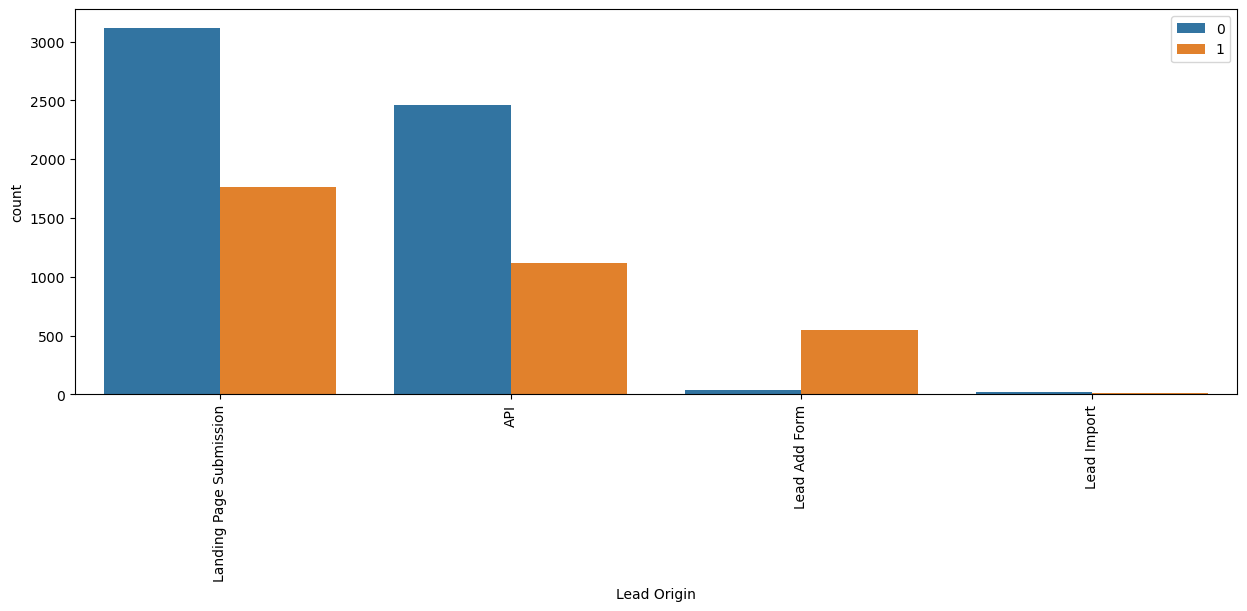

In [47]:
single_var_plot("Lead Origin")

#### Inferences-

- "Landing Page Submission" and "API" are the top two origins for lead and have a 40-50% Conversion rate.
- "Lead Add Form" has a higher lead conversion rate overall.

#### ii) Plot for Categ Variable: "Lead Source"

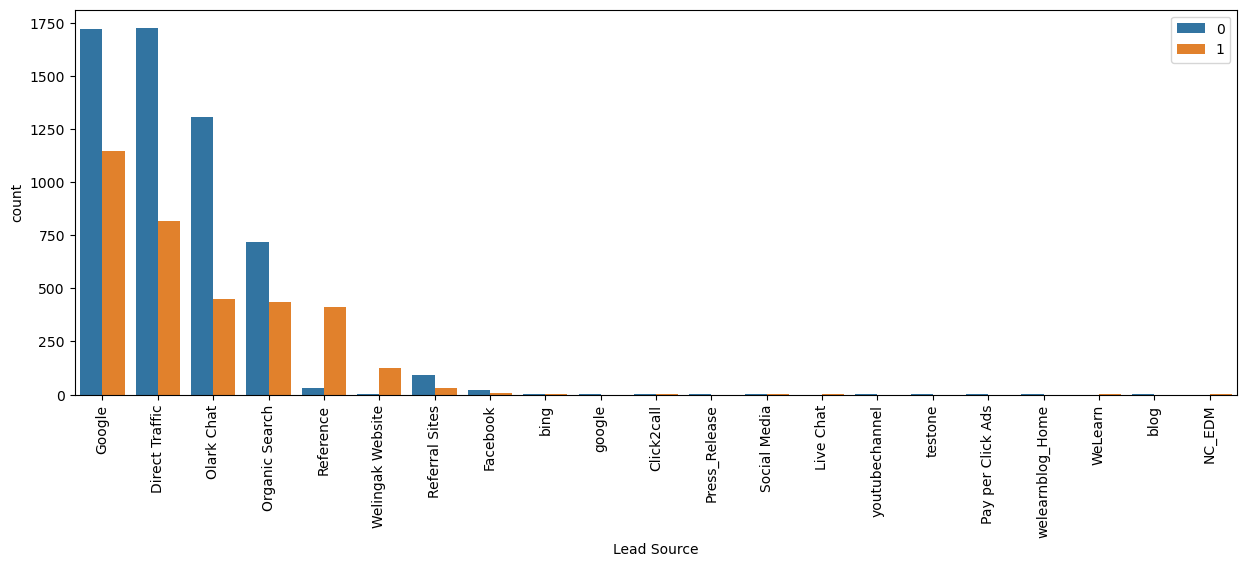

In [48]:
single_var_plot("Lead Source")

#### Inferences-

- "Google" and "Direct Traffic" are the top two sources for lead.
- "Reference" has the highest conversion rate out of all the sources.

#### iii) Plot for Categ Variable: "Last Activity"

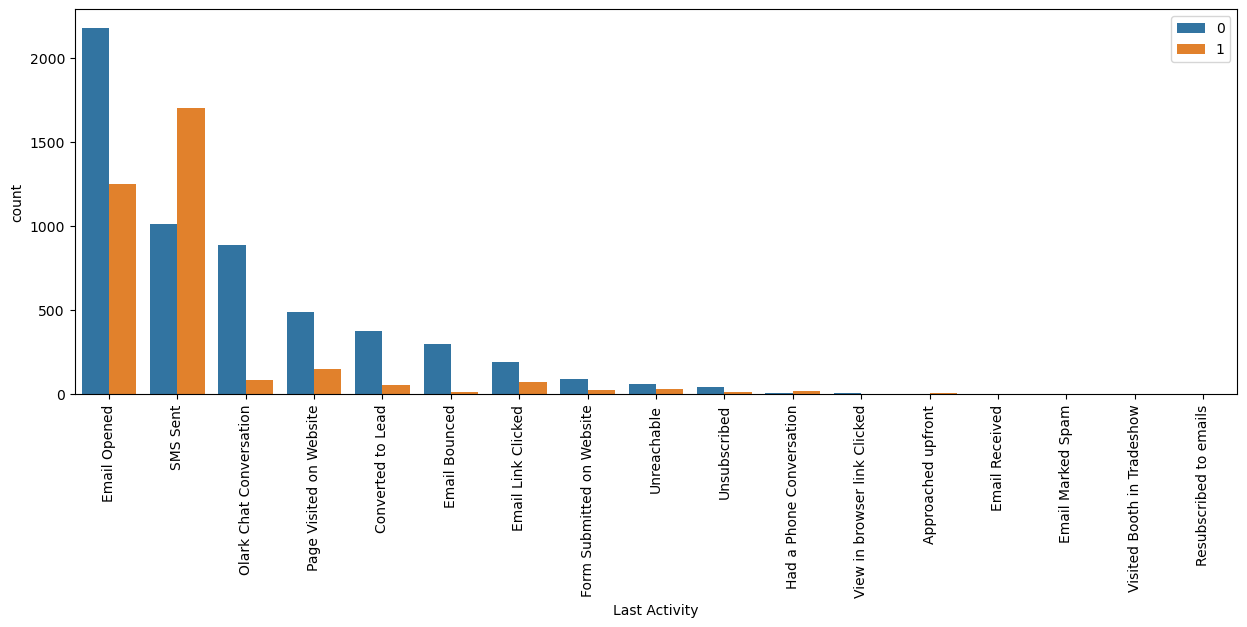

In [49]:
single_var_plot("Last Activity")

#### Inferences-

- "Email Opened" generates the highest number of leads.
- "SMS Sent" has the highest conversion rate out of all the last activities.

#### iv) Plot for Categ Variable: "Country"

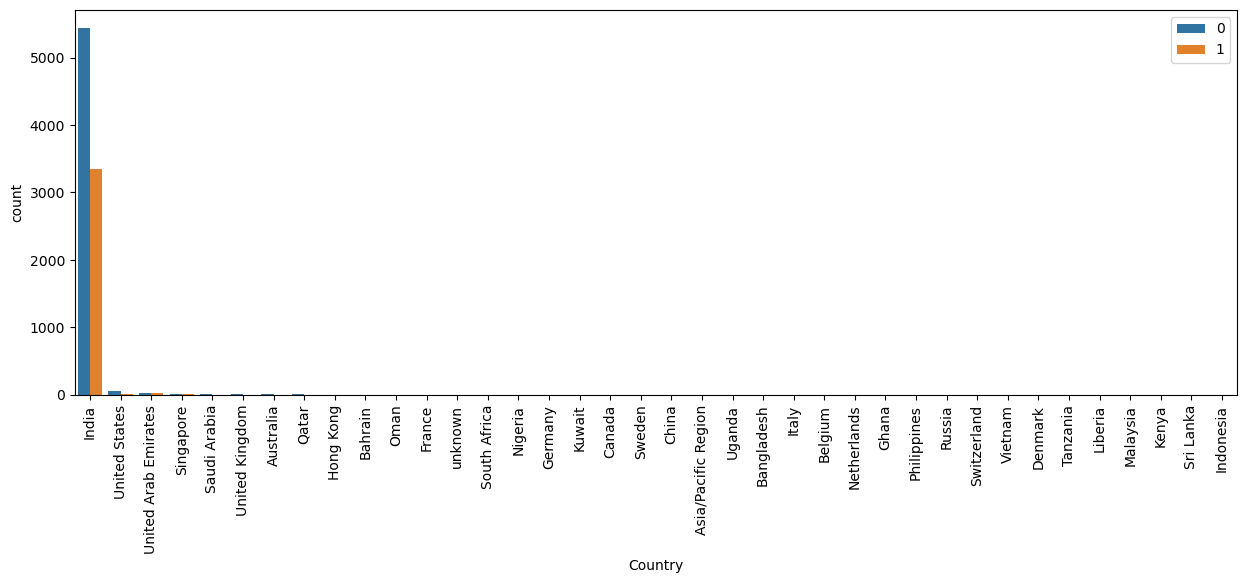

In [50]:
single_var_plot("Country")

#### Inferences-

- Majority of the leads are generated in "India" followed by "United States" and "United Arab Emirates".
- Rest of the countries don't contribute much to lead generation

#### v) Plot for Categ Variable: "Specialization"

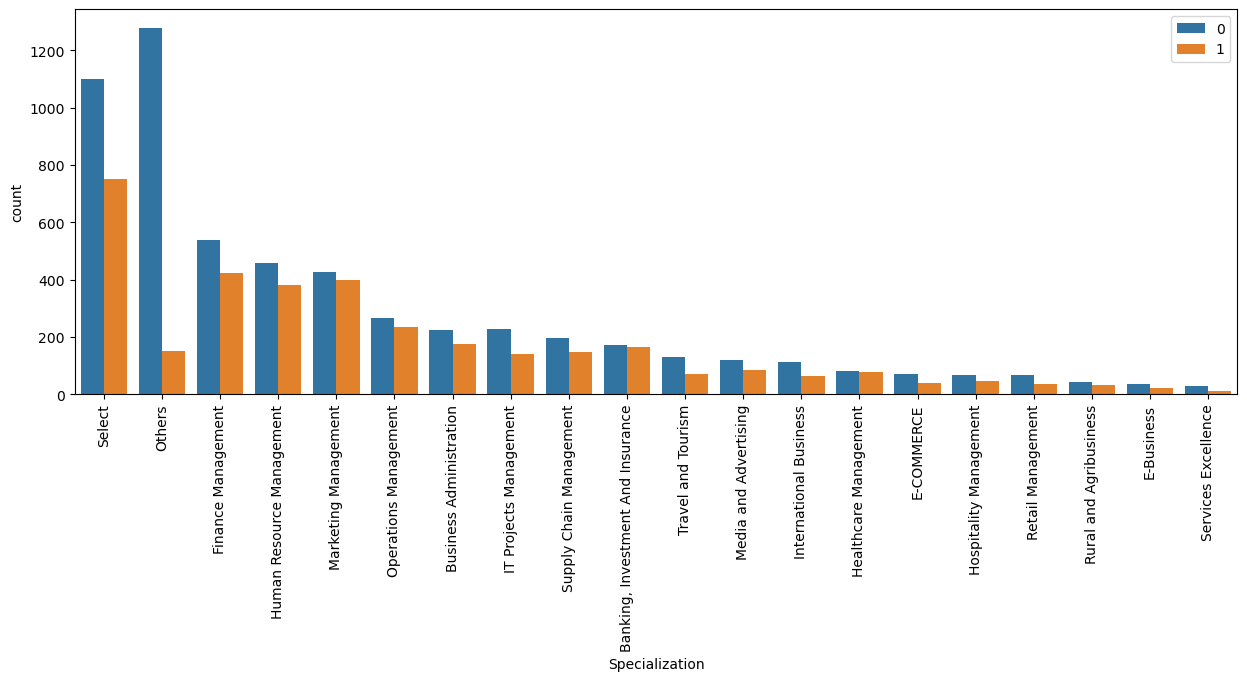

In [51]:
single_var_plot("Specialization")

#### Inferences-

- Majority of the leads are generated via "Select" followed by "Others" and "Finance Management".
- Conversion rate is almost similar across each specialization.

#### vi) Plot for Categ Variable: "How did you hear about X Education"

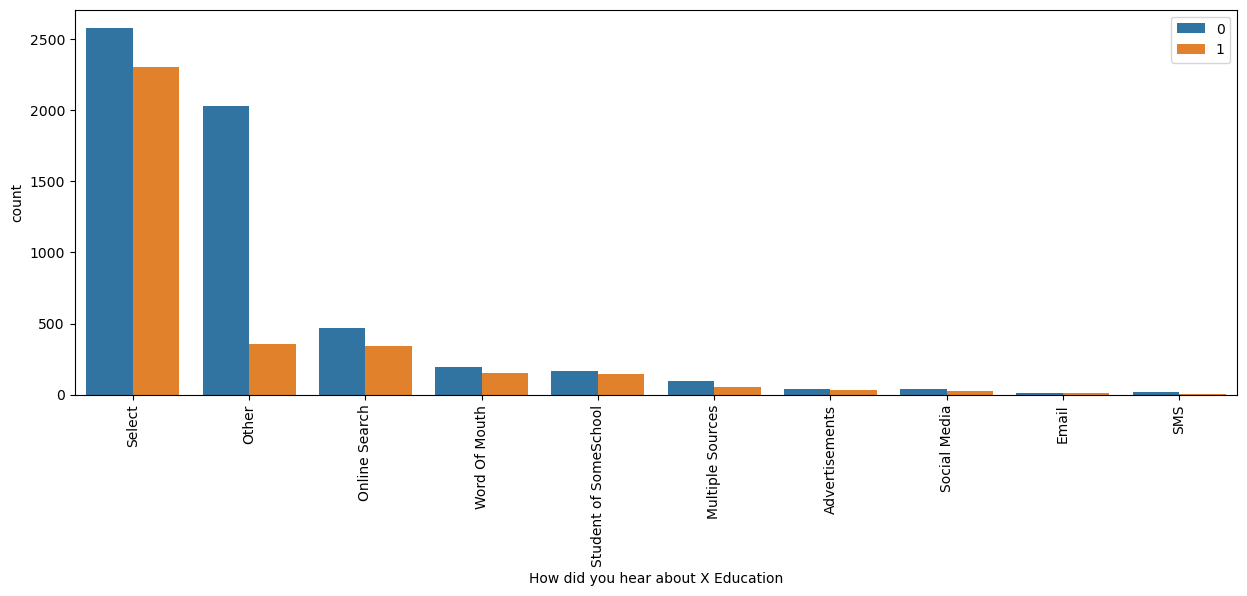

In [52]:
single_var_plot("How did you hear about X Education")

#### Inferences-

- Majority of the leads are generated via "Select" followed by "Others" and "Online Search".

#### vii) Plot for Categ Variables: "Do Not Email" and "What is your current occupation"

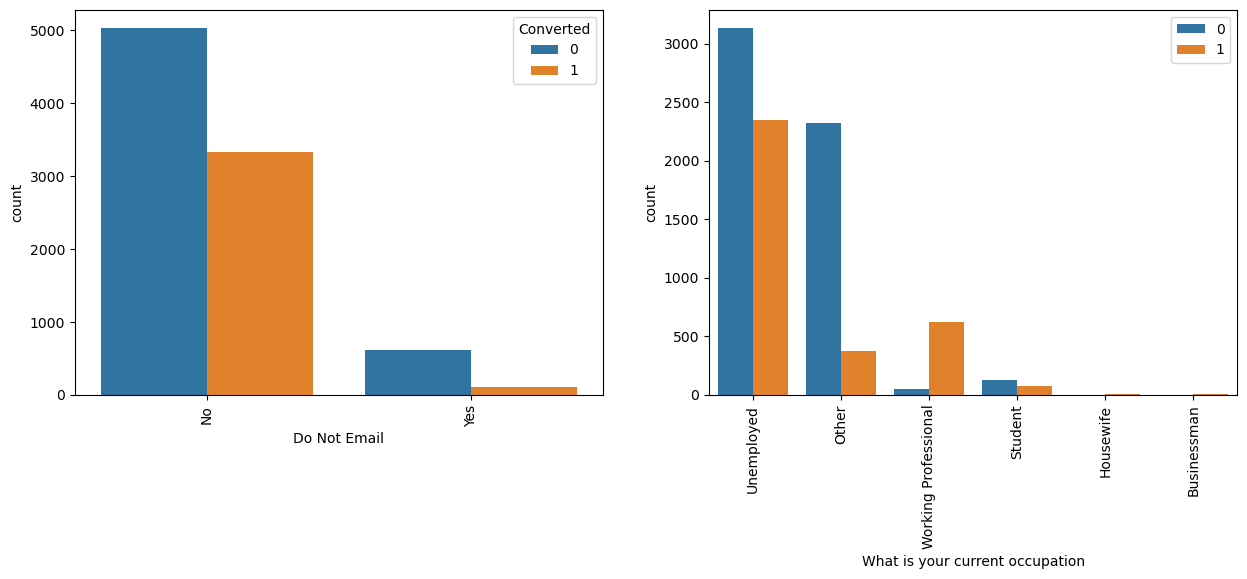

In [53]:
multiple_var_plot(["Do Not Email", "What is your current occupation"])

#### Inferences-

- "Do Not Email"
    - Majority of the leads are generated via "No"
    
- "What is your current occupation"
    - Majority of the leads are generated via "Unemployed" whereas conversion rate is the highest for "Working Professional"

#### viii) Plot for Categ Variables: "Lead Profile" and "A free copy of Mastering The Interview"

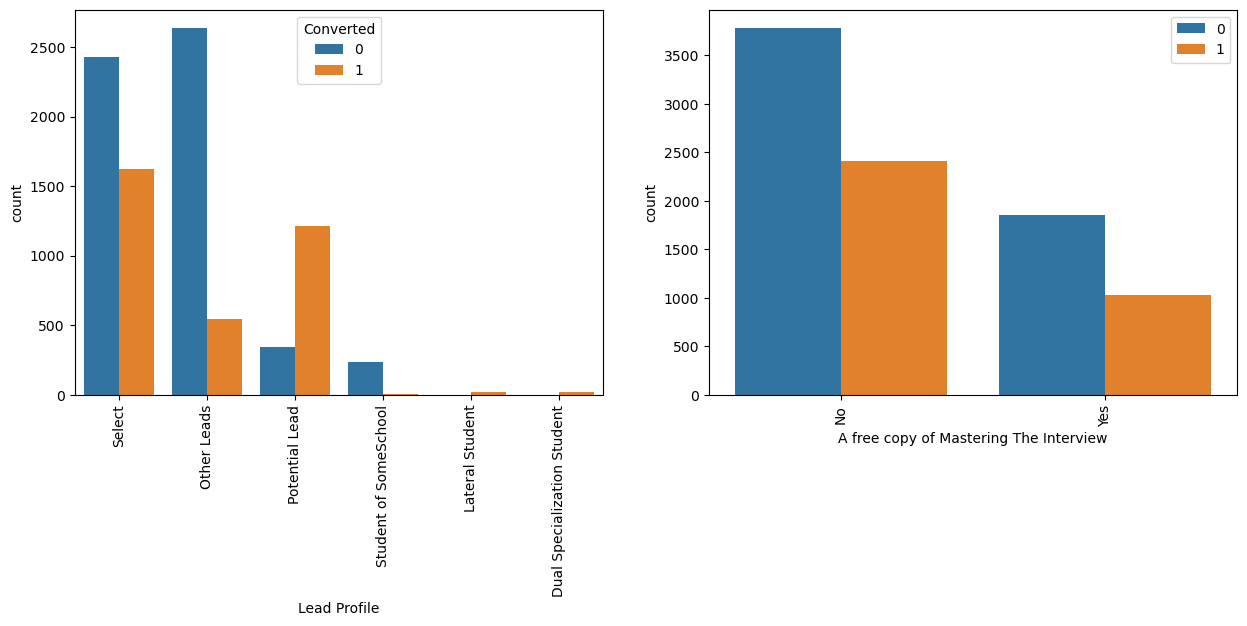

In [54]:
multiple_var_plot(["Lead Profile", "A free copy of Mastering The Interview"])

#### Inferences-

- "Lead Profile"
    - Majority of the leads are generated via "Select"
    
- "A free copy of Mastering The Interview"
    - Majority of the leads are generated via "No"

#### ix) Plot for Categ Variables: "City" and "Last Notable Activity"

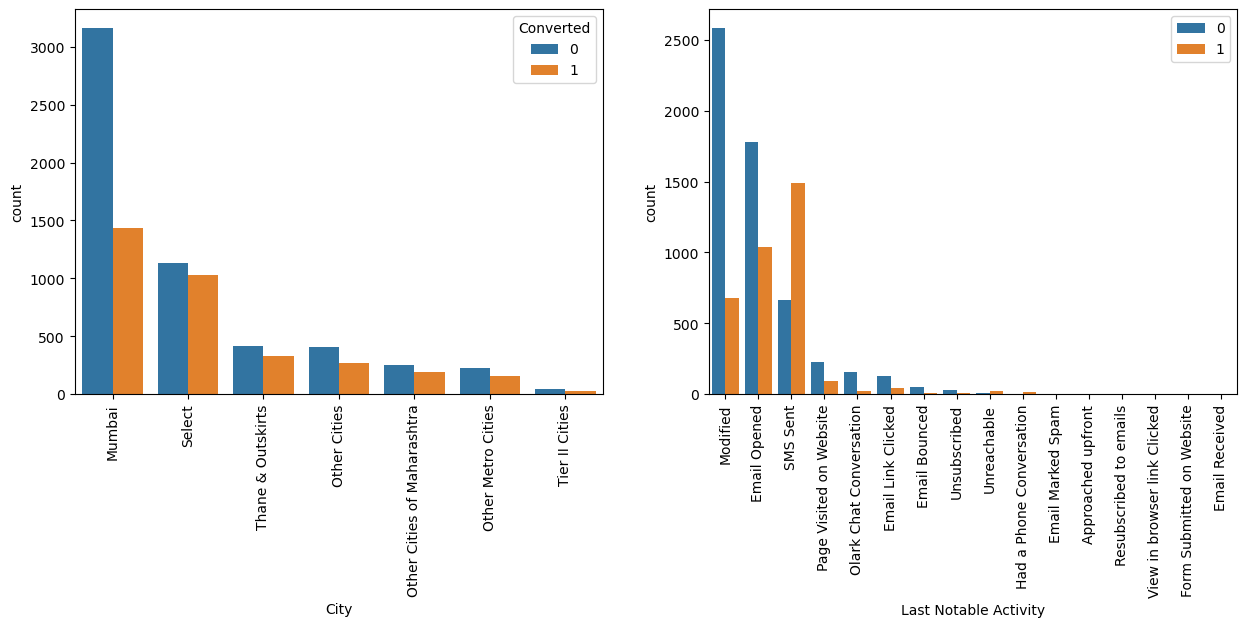

In [55]:
multiple_var_plot(["City", "Last Notable Activity"])

#### Inferences-

- "City"
    - Majority of the leads are generated via "Mumbai" city
    
- "Last Notable Activity"
    - Majority of the leads are generated via "Modified" and the highest conversion rate is for "SMS Sent"

#### b) Outlier Treatment for Numerical Variables

In [56]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Country                                 9074 non-null   obje

Boxplot for:  TotalVisits


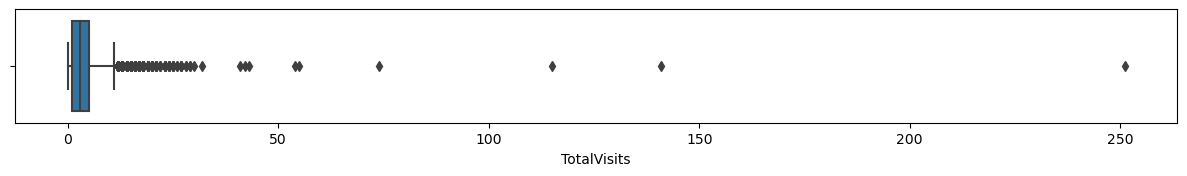

Boxplot for:  Total Time Spent on Website


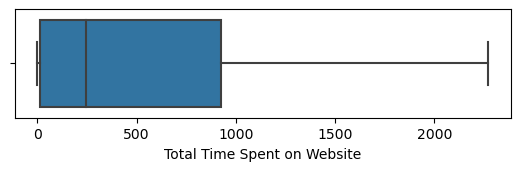

Boxplot for:  Page Views Per Visit


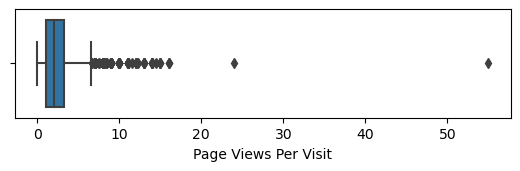

In [57]:
num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Plotting Boxplots for numerical variables

plt.figure(figsize=(15, 5))

for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
    print("Boxplot for: ", var)
    plt.show()

In [58]:
# Outlier treatment by capping the values at 95%

percentile = df_leads['TotalVisits'].quantile([0.95]).values
df_leads['TotalVisits'][df_leads['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = df_leads['Page Views Per Visit'].quantile([0.95]).values
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] >= percentile[0]] = percentile[0]

Boxplot for:  TotalVisits


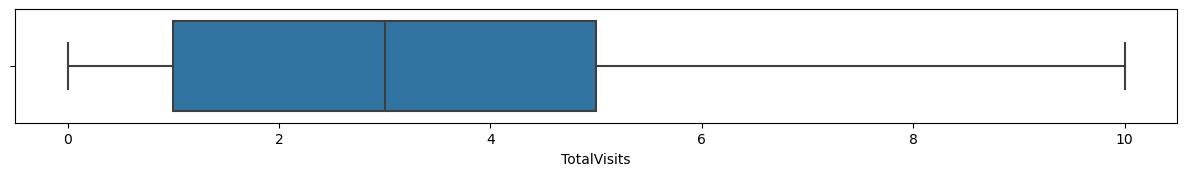

Boxplot for:  Total Time Spent on Website


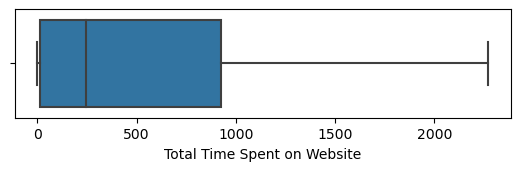

Boxplot for:  Page Views Per Visit


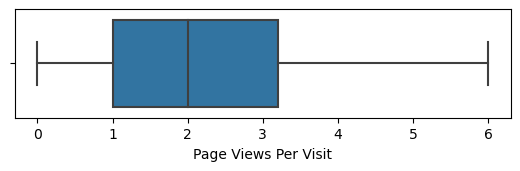

In [59]:
num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Plotting Boxplots again for numerical variables to verify after outlier treatment

plt.figure(figsize=(15, 5))

for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
    print("Boxplot for: ", var)
    plt.show()

In [60]:
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [61]:
#Selecting few columns that aen't required and won't be contributing much to the model based on EDA performed

cols_to_drop = ["Prospect ID", 'Lead Number', 'Country', 
                'How did you hear about X Education', 'A free copy of Mastering The Interview']

In [62]:
# Dropping the columns that aren't required

df_leads_coldrop = df_leads.drop(cols_to_drop, axis=1)

In [63]:
#Checking the number of rows and columns of the dataset

df_leads_coldrop.shape

(9074, 13)

## Step 4: Preparing Data for Model Building

In [64]:
# To convert binary variables to 0/1 format

df_leads_coldrop['Do Not Email'] = df_leads_coldrop['Do Not Email'].map({'Yes': 1, 'No': 0})

In [65]:
# Forming a list of Categorical variables

categ_var_list = list(df_leads_coldrop.columns[df_leads_coldrop.dtypes == 'object'])
categ_var_list

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Lead Profile',
 'City',
 'Last Notable Activity']

In [66]:
# To create dummy variables and drop first ones

dummy = pd.get_dummies(df_leads_coldrop[categ_var_list], drop_first=True)

# To add result to the original dataframe

df_leads_coldrop = pd.concat([df_leads_coldrop, dummy], axis=1)

# To drop the original variables

df_leads_coldrop = df_leads_coldrop.drop(categ_var_list,1)

In [67]:
#Displaying a few rows of the dataset

df_leads_coldrop.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [68]:
#Checking the number of rows and columns of the dataset

df_leads_coldrop.shape

(9074, 94)

## Step 5: Splitting the Data into Training Set and Test Set

In [69]:
# Putting feature variable to X

X = df_leads_coldrop.drop(['Converted'],axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [70]:
# Putting response variable to y

y = df_leads_coldrop['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [71]:
# To split the data into train and test with a 70-30 Split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling for the datasets

In [72]:
#Instantiating an object using "StandardScaler()"

scaler = StandardScaler()

# Numerical variables
numerical_var_list = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [73]:
#Applying scaler to all numerical columns

X_train[numerical_var_list] = scaler.fit_transform(X_train[numerical_var_list])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.122613,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [74]:
# Checking the conversion rate

conversion = (sum(df_leads_coldrop['Converted'])/len(df_leads_coldrop['Converted'].index))*100
print("The Conversion Rate is: ", conversion)

The Conversion Rate is:  37.85541106458012


### Step 7: Feature Selection using RFE

In [75]:
# TInstantiating an object using "LogisticRegression()"

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [76]:
# Running RFE with 15 variables

rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [77]:
# To check output of RFE

rfe.support_

array([ True, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False])

In [78]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 43),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Pay per Click Ads', False, 63),
 ('Lead Source_Press_Release', False, 68),
 ('Lead Source_Reference', False, 17),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Social Media', False, 45),
 ('Lead Source_WeLearn', False, 79),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 49),
 ('Lead Source_blog', False, 54),
 ('Lead Source_google', False, 19),
 ('Lead Source_testone', False, 53),
 ('Lead Source_

In [79]:
# Features selected

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Lead Profile_Other Leads', 'Lead Profile_Select',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [80]:
# Features eliminated

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to e

### Step 8: Assessing the models

In [81]:
# Function for building the model

def build_model(X,y):
    X_sm = sm.add_constant(X)    
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()   
    print(logm.summary())  
    return X_sm, logm

In [82]:
# Function to calculate Variance Inflation Factor (VIF)

def check_VIF(X_in):
    X = X_in.drop('const',1) 
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [83]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    
    return y_train_pred_final

In [84]:
# Function to get confusion matrix and accuracy

def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [85]:
# Function for calculating metric beyond accuracy

def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

#### Building a Model  ||  Model Iteration 1

In [86]:
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2433.6
Date:                Tue, 21 Nov 2023   Deviance:                       4867.3
Time:                        21:38:33   Pearson chi2:                 6.33e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4326
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Inferences-

- "What is your current occupation_Housewife" has a high p-value (>0.05). Hence, it is insignificant and can be dropped.

#### Building a Model  ||  Model Iteration 2

In [87]:
col_first_iter = col.drop('What is your current occupation_Housewife', 1)

# To rebuild the model
X2, logm2 = build_model(X_train[col_first_iter],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2438.5
Date:                Tue, 21 Nov 2023   Deviance:                       4877.1
Time:                        21:38:34   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4317
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [88]:
#Checking VIF 

check_VIF(X2)

,Features,VIF
8,What is your current occupation_Other,6.67
10,Lead Profile_Other Leads,6.61
3,Lead Source_Olark Chat,1.72
2,Lead Origin_Lead Add Form,1.57
7,Last Activity_SMS Sent,1.54
11,Lead Profile_Select,1.48
6,Last Activity_Olark Chat Conversation,1.43
4,Lead Source_Welingak Website,1.35
1,Total Time Spent on Website,1.28
9,What is your current occupation_Working Professional,1.17


#### Inferences 
- Dropping the variables that have a higher VIF value - "What is your current occupation_Other" and "Lead Profile_Other Leads"

#### Building a Model  ||  Model Iteration 3

In [89]:
col_second_iter = col_first_iter.drop(["What is your current occupation_Other", "Lead Profile_Other Leads"], 1)

# To rebuild the model
X3, logm3 = build_model(X_train[col_second_iter],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.3
Date:                Tue, 21 Nov 2023   Deviance:                       5400.5
Time:                        21:38:34   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3829
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Inferences-

- "Lead Profile_Select" has a high p-value (>0.05). Hence, it is insignificant and can be dropped.

#### Building a Model  ||  Model Iteration 4

In [90]:
col_third_iter = col_second_iter.drop("Lead Profile_Select", 1)

# To rebuild the model
X4, logm4 = build_model(X_train[col_third_iter],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.7
Date:                Tue, 21 Nov 2023   Deviance:                       5401.4
Time:                        21:38:34   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3828
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Inferences-

- All variables have low p-values (<0.05). Hence, all the columns are significant now.

In [91]:
#Checking VIF 

check_VIF(X4)

,Features,VIF
2,Lead Origin_Lead Add Form,1.56
3,Lead Source_Olark Chat,1.56
6,Last Activity_Olark Chat Conversation,1.34
4,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.27
7,Last Activity_SMS Sent,1.22
8,What is your current occupation_Working Professional,1.16
0,Do Not Email,1.04
9,Lead Profile_Student of SomeSchool,1.02
5,Last Activity_Had a Phone Conversation,1.00


#### Inferences-

- VIF score of all variables is < 5 indicating that there is no multicollinearity present.

<AxesSubplot:>

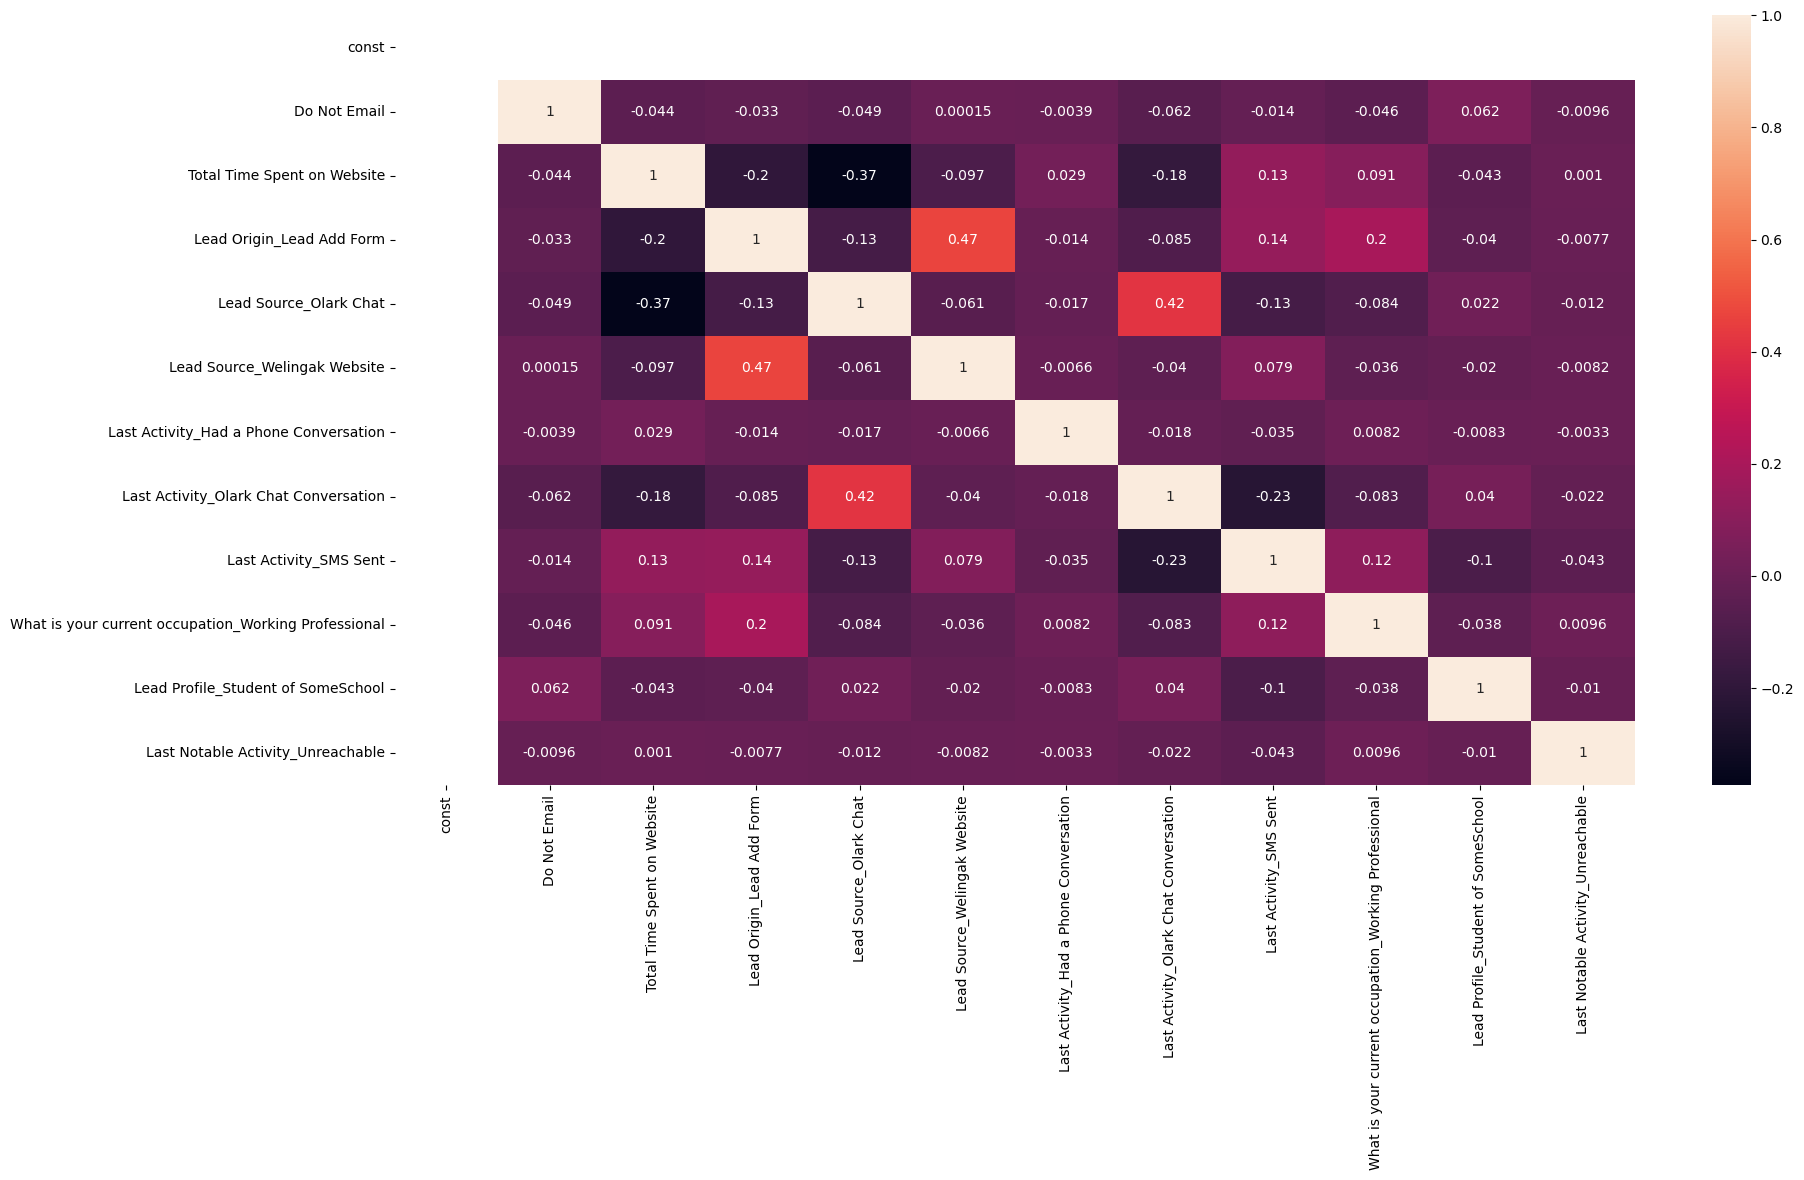

In [92]:
# To plot correlations

plt.figure(figsize = (20,10))  
sns.heatmap(X4.corr(), annot = True)

In [93]:
# To get predicted values on train set

y_train_pred_final = get_pred(X4,logm4)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.167665,3009,0
1,0,0.288530,1012,0
2,0,0.547170,9226,1
3,1,0.850401,4750,1
4,1,0.896828,7987,1


In [94]:
# Confusion Matrix and accuracy

confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3434  471]
 [ 734 1712]]
Training Accuracy:  0.810266099826799


#### Inferences-

- Model Number 4 is the model we have selected because of the following reasons-

    - All variables have low p-values (<0.05). Hence, all the columns are significant now.
    - VIF score of all variables is < 5 indicating that there is no multicollinearity present.
    - Training accuracy of 81%

### Step 9: Plotting the ROC Curve and Checking Accuracy

In [95]:
#Accuracy

other_metrics(confusion)

Sensitivity:  0.6999182338511856
Specificity:  0.8793854033290653
False postive rate - predicting the lead conversion when the lead does not convert:  0.1206145966709347
Positive predictive value:  0.7842418689876317
Negative predictive value:  0.8238963531669866


In [96]:
# Plotting the ROC Curve

# Function to plot ROC
def roc_plot(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [97]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

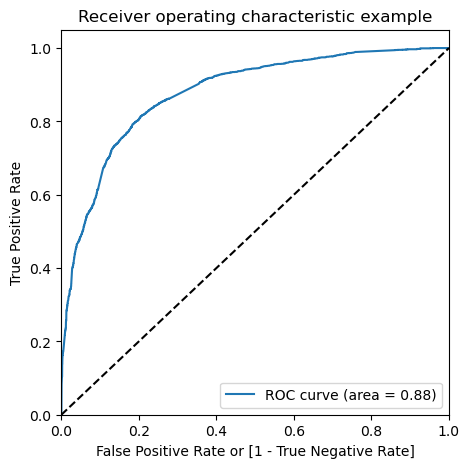

In [98]:
# Plotting ROC Curve

roc_plot(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [99]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.8779630282998818


#### Inferences-

- Area under curve (auc) is approximately 0.88; close to ideal auc of 1

#### Finding optimal cutoff point

In [100]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.167665,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.288530,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.547170,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.850401,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.896828,7987,1,1,1,1,1,1,1,1,1,1,0


In [101]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['Probability','Accuracy', 'Sensitivity', 'Specificity'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0  0.0          0.385136  1.000000     0.000000   
0.1  0.1          0.595969  0.968520     0.362612   
0.2  0.2          0.732483  0.918643     0.615877   
0.3  0.3          0.794835  0.832788     0.771063   
0.4  0.4          0.808534  0.760016     0.838924   
0.5  0.5          0.810266  0.699918     0.879385   
0.6  0.6          0.785231  0.573590     0.917798   
0.7  0.7          0.774051  0.500409     0.945455   
0.8  0.8          0.753267  0.407195     0.970038   
0.9  0.9          0.704299  0.251022     0.988220   


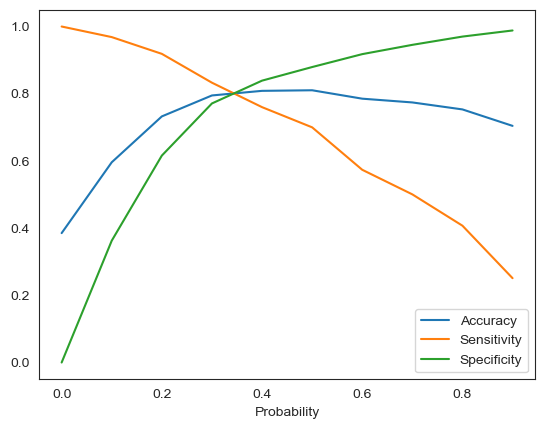

In [102]:
# Plotting accuracy, sensitivity and specificity for various probabilities

sns.set_style("white")
cutoff_df.plot.line(x="Probability", y=["Accuracy","Sensitivity", "Specificity"])
plt.show()

#### Inferences-

-  0.4 is the optimum point to take as a cutoff probability.

In [103]:
# Using 0.4 threshold for predictions

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.167665,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.288530,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.547170,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.850401,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.896828,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [104]:
# Confusion matrix and Overall Accuracy

confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3276  629]
 [ 587 1859]]
Training Accuracy:  0.8085340891198236


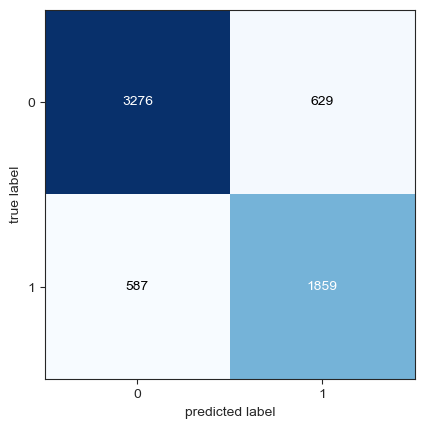

In [105]:
# Plotting confusion matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion2)
plt.show()

In [106]:
# Other metrics

other_metrics(confusion2)

Sensitivity:  0.7600163532297629
Specificity:  0.8389244558258643
False postive rate - predicting the lead conversion when the lead does not convert:  0.16107554417413572
Positive predictive value:  0.7471864951768489
Negative predictive value:  0.8480455604452498


In [107]:
# Classification report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      3905
           1       0.75      0.76      0.75      2446

    accuracy                           0.81      6351
   macro avg       0.80      0.80      0.80      6351
weighted avg       0.81      0.81      0.81      6351



In [108]:
# Calculating Precision and Recall

# Precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7842418689876317

In [109]:
# Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6999182338511856

In [110]:
# Using Sci-Kit Learn

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7842418689876317

In [111]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6999182338511856

#### Precision and Recall Tradeoff

In [112]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [113]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

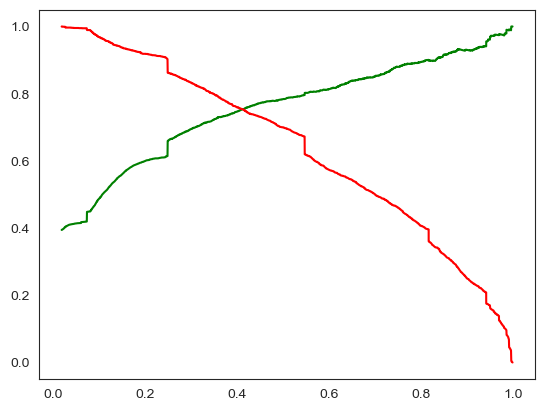

In [114]:
# Plotting precision vs recall for different thresholds

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Inferences-

-  0.4 is the optimum point to take as a cutoff probability.

In [115]:
# Using 0.4 threshold for predictions

y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.167665,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.288530,1012,0,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.547170,9226,1,1,1,1,1,1,1,0,0,0,0,1,1
3,1,0.850401,4750,1,1,1,1,1,1,1,1,1,1,0,1,1
4,1,0.896828,7987,1,1,1,1,1,1,1,1,1,1,0,1,1


In [116]:
# Confusion matrix and overall accuracy

confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3276  629]
 [ 587 1859]]
Training Accuracy:  0.8085340891198236


In [117]:
# Other metrics

other_metrics(confusion3)

Sensitivity:  0.7600163532297629
Specificity:  0.8389244558258643
False postive rate - predicting the lead conversion when the lead does not convert:  0.16107554417413572
Positive predictive value:  0.7471864951768489
Negative predictive value:  0.8480455604452498


#### Inferences-

-  We will use 0.4 as a cutoff probability for Test Set

### Step 10: Making predictions on the Test Set

In [118]:
# Feature transform on Test set using "Transform" only

X_test[num_var] = scaler.transform(X_test[num_var])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0.284772,-0.600595,0.955505,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0.643547,1.887326,1.510766,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,-0.432779,-0.752879,-0.155018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,1.719873,-0.587751,2.066027,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [119]:
# Getting Final Features

X_test_sm = X_test[col_third_iter]

# Adding a constant

X_test_sm = sm.add_constant(X_test_sm)

In [120]:
# Making predictions

y_test_pred = logm4.predict(X_test_sm)

y_test_pred.head()

3271    0.108910
1490    0.970271
7936    0.093238
4216    0.816979
3830    0.110332
dtype: float64

In [121]:
# To convert y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
3271,0.108910
1490,0.970271
7936,0.093238
4216,0.816979
3830,0.110332


In [122]:
# To convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [123]:
# Putting Lead ID to index

y_test_df['Lead ID'] = y_test_df.index

In [124]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)

y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# To append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.108910
1,1,1490,0.970271
2,0,7936,0.093238
3,1,4216,0.816979
4,0,3830,0.110332


In [126]:
# Renaming the columns

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.108910
1,1,1490,0.970271
2,0,7936,0.093238
3,1,4216,0.816979
4,0,3830,0.110332


In [127]:
# Putting the threshold of 0.4 as derived

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.108910,0
1,1,1490,0.970271,1
2,0,7936,0.093238,0
3,1,4216,0.816979,1
4,0,3830,0.110332,0


In [128]:
# Calculating Area Under The Curve

print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.8705463092868146


In [129]:
# Confusion matrix and overall accuracy

confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1459  275]
 [ 247  742]]
Training Accuracy:  0.8082996694821888


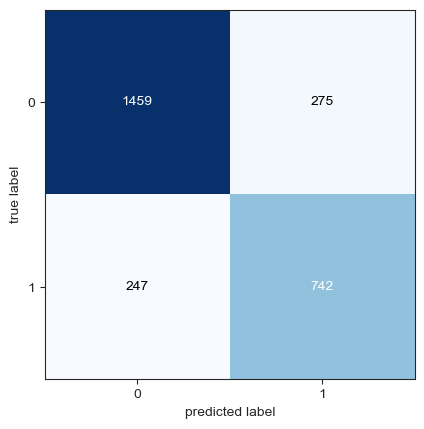

In [130]:
# Plotting confusion matrix

plot_confusion_matrix(conf_mat=confusion_test)
plt.show()

In [131]:
# Other metrics

other_metrics(confusion_test)

Sensitivity:  0.750252780586451
Specificity:  0.8414071510957324
False postive rate - predicting the lead conversion when the lead does not convert:  0.15859284890426759
Positive predictive value:  0.7295968534906588
Negative predictive value:  0.8552168815943728


In [132]:
#Classification Report

print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1734
           1       0.73      0.75      0.74       989

    accuracy                           0.81      2723
   macro avg       0.79      0.80      0.79      2723
weighted avg       0.81      0.81      0.81      2723



In [133]:
# Calculating Precision and Recall

# Precision = TP / TP + FP

confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.7295968534906588

In [134]:
# Recall = TP / TP + FN

confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.750252780586451

### Step 11: Assigning Lead Score

- Lead Score = 100 * ConversionProbability
- This needs to be calculated for all the leads from the original dataset (train + test).

In [135]:
# To select test set

leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.108910,0
1,1,1490,0.970271,1
2,0,7936,0.093238,0
3,1,4216,0.816979,1
4,0,3830,0.110332,0


In [136]:
# To select train set

leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.167665,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.288530,1012,0,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.547170,9226,1,1,1,1,1,1,1,0,0,0,0,1,1
3,1,0.850401,4750,1,1,1,1,1,1,1,1,1,1,0,1,1
4,1,0.896828,7987,1,1,1,1,1,1,1,1,1,1,0,1,1


In [137]:
# To drop unnecessary columns from train set

leads_train_pred = leads_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.167665,0
1,1012,0,0.288530,0
2,9226,0,0.547170,1
3,4750,1,0.850401,1
4,7987,1,0.896828,1


In [138]:
# To concatenate 2 datasets

lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.167665,0
1,1012,0,0.288530,0
2,9226,0,0.547170,1
3,4750,1,0.850401,1
4,7987,1,0.896828,1


In [139]:
# To inspect the shape of the final dataset

print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6351, 4)
(2723, 4)
(9074, 4)


In [140]:
# To ensure uniqueness of Lead IDs

len(lead_full_pred['Lead ID'].unique().tolist())

9074

In [141]:
# To calculate the Lead Score

lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3009,0,0.167665,0,17
1,1012,0,0.288530,0,29
2,9226,0,0.547170,1,55
3,4750,1,0.850401,1,85
4,7987,1,0.896828,1,90


In [142]:
# To make the Lead ID column as index

lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Lead ID,,,,
0,0,0.248945,0,25
1,0,0.263943,0,26
2,1,0.681508,1,68
3,0,0.142607,0,14
4,1,0.632787,1,63


In [143]:
# To get Lead Number column from original data

leads_original = leadsdata_raw[['Lead Number']]
leads_original.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [144]:
# To concatenate the 2 dataframes based on index

leads_with_score = pd.concat([leads_original, lead_full_pred], axis=1)
leads_with_score.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,660737,0.0,0.248945,0.0,25.0
1,660728,0.0,0.263943,0.0,26.0
2,660727,1.0,0.681508,1.0,68.0
3,660719,0.0,0.142607,0.0,14.0
4,660681,1.0,0.632787,1.0,63.0


### Step 12: Finding out Feature Importance

In [145]:
# To display features with corrsponding coefficients in final model

pd.options.display.float_format = '{:.2f}'.format
new_params = logm4.params[1:]
new_params

Do Not Email                                           -1.63
Total Time Spent on Website                            1.13 
Lead Origin_Lead Add Form                              3.92 
Lead Source_Olark Chat                                 1.32 
Lead Source_Welingak Website                           1.98 
Last Activity_Had a Phone Conversation                 2.87 
Last Activity_Olark Chat Conversation                  -1.43
Last Activity_SMS Sent                                 1.29 
What is your current occupation_Working Professional   2.76 
Lead Profile_Student of SomeSchool                     -2.57
Last Notable Activity_Unreachable                      1.82 
dtype: float64

In [146]:
# Relative feature importance

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -41.62
Total Time Spent on Website                            28.91 
Lead Origin_Lead Add Form                              100.00
Lead Source_Olark Chat                                 33.75 
Lead Source_Welingak Website                           50.39 
Last Activity_Had a Phone Conversation                 73.25 
Last Activity_Olark Chat Conversation                  -36.47
Last Activity_SMS Sent                                 32.96 
What is your current occupation_Working Professional   70.43 
Lead Profile_Student of SomeSchool                     -65.36
Last Notable Activity_Unreachable                      46.49 
dtype: float64

In [147]:
# To sort features based on importance

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            9 
Total Time Spent on Website                             0 
Lead Origin_Lead Add Form                               6 
Lead Source_Olark Chat                                  1 
Lead Source_Welingak Website                            7 
Last Activity_Had a Phone Conversation                  3 
Last Activity_Olark Chat Conversation                   10
Last Activity_SMS Sent                                  4 
What is your current occupation_Working Professional    8 
Lead Profile_Student of SomeSchool                      5 
Last Notable Activity_Unreachable                       2 
dtype: int64

### Step 13: Conclusions

#### Evaluation Metrics for the Train Dataset:

- Accuracy: 0.81
    
- Sensitivity: 0.70
    
- Specificity: 0.88
    
- Precision: 0.78

- Recall: 0.70

- Positive predictive value:  0.78

- Negative predictive value:  0.82

#### Evaluation Metrics for the Test Dataset:

- Accuracy: 0.81
    
- Sensitivity: 0.75
    
- Specificity: 0.84
    
- Precision: 0.73

- Recall: 0.75

- Positive predictive value:  0.73

- Negative predictive value:  0.86

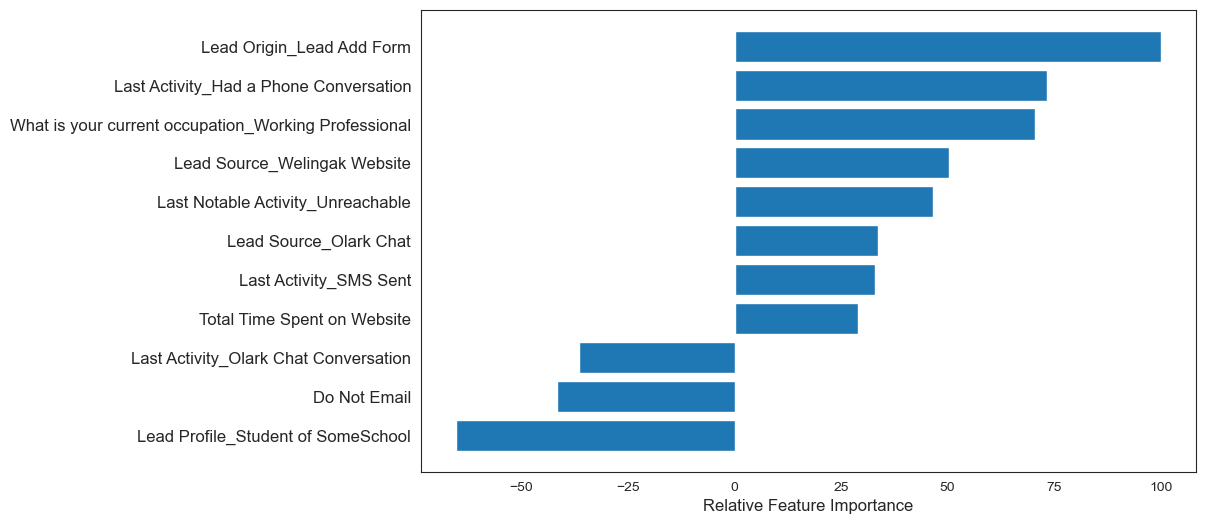

In [148]:
# To plot features with their relative importance

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col_third_iter].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

#### Features having positive impact on conversion probability in decreasing order of impact:

- Lead Origin_Lead Add Form
- Last Activity_Had a Phone Conversation
- What is your current occupation_Working Professional
- Lead Source_Welingak Website 
- Last Notable Activity_Unreachable
- Lead Source_Olark Chat
- Last Activity_SMS Sent
- Total Time Spent on Website


#### Features having negative impact on conversion probability in decreasing order of impact:

- Lead Profile_Student of SomeSchool
- Do Not Email
- Last Activity_Olark Chat Conversation